In [25]:
import pandas as pd
import numpy as np
import json

# Data Cleaning

In [210]:
df_json = pd.read_json("/Users/ambardubey/Desktop/Capgemini/Spam/scraped_articles.json")
df_json.head()

,newspapers
cnbc_investing,{'rss': 'https://www.cnbc.com/id/15839069/devi...
cnbc_top_news,{'rss': 'https://www.cnbc.com/id/100003114/dev...
cnnmoney,{'rss': 'http://rss.cnn.com/rss/money_latest.r...
economist_business,{'rss': 'https://www.economist.com/sections/bu...
economist_science_and_tech,{'rss': 'https://www.economist.com/sections/sc...


In [211]:
df_json = df_json.reset_index()

In [212]:
from pandas.io.json import json_normalize

In [213]:
df_json.columns

Index(['index', 'newspapers'], dtype='object')

In [214]:
df_json.shape

(31, 2)

In [220]:
df_json.head()

,index,newspapers
0,cnbc_investing,{'rss': 'https://www.cnbc.com/id/15839069/devi...
1,cnbc_top_news,{'rss': 'https://www.cnbc.com/id/100003114/dev...
2,cnnmoney,{'rss': 'http://rss.cnn.com/rss/money_latest.r...
3,economist_business,{'rss': 'https://www.economist.com/sections/bu...
4,economist_science_and_tech,{'rss': 'https://www.economist.com/sections/sc...


In [221]:
news_data = json_normalize(df_json["newspapers"], meta=["index"], errors='ignore')

In [222]:
news_data.head()

,articles,link,rss
0,[{'link': 'https://www.cnbc.com/2018/03/23/cra...,https://www.cnbc.com/investing/,https://www.cnbc.com/id/15839069/device/rss/rs...
1,[{'link': 'https://www.cnbc.com/2018/03/25/bit...,https://www.cnbc.com/,https://www.cnbc.com/id/100003114/device/rss/r...
2,[{'link': 'http://rss.cnn.com/~r/rss/money_lat...,http://money.cnn.com/,http://rss.cnn.com/rss/money_latest.rss/
3,[{'link': 'https://www.economist.com/news/busi...,https://www.economist.com/topics/business,https://www.economist.com/sections/business-fi...
4,[{'link': 'https://www.economist.com/news/scie...,https://www.economist.com/topics/science,https://www.economist.com/sections/science-tec...


In [223]:
article_data = json_normalize(df_json["newspapers"], record_path="articles", errors='ignore')
article_data.head()

,author,link,published,text,title
0,"[Elizabeth Gurdus, Andrew Harrer, Bloomberg, G...",https://www.cnbc.com/2018/03/23/cramer-remix-t...,2018-03-24T00:00:00,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer Remix: The one bright spot after a toug...
1,[Elizabeth Gurdus],https://www.cnbc.com/2018/03/23/cramer-blesses...,2018-03-23T23:36:00,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer: Dropbox deserves to trade like a cloud...
2,[Elizabeth Gurdus],https://www.cnbc.com/2018/03/23/cramer-tommy-h...,2018-03-23T23:25:00,After a week of panic and selling for the stoc...,Cramer: Tommy Hilfiger parent PVH is a buy ahe...
3,[Elizabeth Gurdus],https://www.cnbc.com/2018/03/23/cramers-game-p...,2018-03-23T23:12:00,Paychex: This old Cramer-fave will report earn...,Cramer's game plan: Be prepared for more White...
4,"[Heidi Chung, Getty Images, Source, Lucas Jack...",https://www.cnbc.com/2018/03/23/5-dow-stocks-a...,2018-03-23T16:19:00,The major indexes tried to recover Friday afte...,Five Dow stocks are in bear market territory. ...


In [224]:
article_data.shape

(631, 5)

In [225]:
df = article_data

In [226]:
df.head()

,author,link,published,text,title
0,"[Elizabeth Gurdus, Andrew Harrer, Bloomberg, G...",https://www.cnbc.com/2018/03/23/cramer-remix-t...,2018-03-24T00:00:00,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer Remix: The one bright spot after a toug...
1,[Elizabeth Gurdus],https://www.cnbc.com/2018/03/23/cramer-blesses...,2018-03-23T23:36:00,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer: Dropbox deserves to trade like a cloud...
2,[Elizabeth Gurdus],https://www.cnbc.com/2018/03/23/cramer-tommy-h...,2018-03-23T23:25:00,After a week of panic and selling for the stoc...,Cramer: Tommy Hilfiger parent PVH is a buy ahe...
3,[Elizabeth Gurdus],https://www.cnbc.com/2018/03/23/cramers-game-p...,2018-03-23T23:12:00,Paychex: This old Cramer-fave will report earn...,Cramer's game plan: Be prepared for more White...
4,"[Heidi Chung, Getty Images, Source, Lucas Jack...",https://www.cnbc.com/2018/03/23/5-dow-stocks-a...,2018-03-23T16:19:00,The major indexes tried to recover Friday afte...,Five Dow stocks are in bear market territory. ...


In [58]:
df.to_excel('/Users/ambardubey/Downloads/Json_Convert.xlsx')

In [227]:
del df['author']

In [228]:
del df['published']

In [229]:
df.head()

,link,text,title
0,https://www.cnbc.com/2018/03/23/cramer-remix-t...,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer Remix: The one bright spot after a toug...
1,https://www.cnbc.com/2018/03/23/cramer-blesses...,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer: Dropbox deserves to trade like a cloud...
2,https://www.cnbc.com/2018/03/23/cramer-tommy-h...,After a week of panic and selling for the stoc...,Cramer: Tommy Hilfiger parent PVH is a buy ahe...
3,https://www.cnbc.com/2018/03/23/cramers-game-p...,Paychex: This old Cramer-fave will report earn...,Cramer's game plan: Be prepared for more White...
4,https://www.cnbc.com/2018/03/23/5-dow-stocks-a...,The major indexes tried to recover Friday afte...,Five Dow stocks are in bear market territory. ...


In [64]:
df.to_excel('/Users/ambardubey/Downloads/Json_Convert1.xlsx')

In [230]:
df = pd.read_excel('/Users/ambardubey/Desktop/Capgemini/Spam/Final/Json_Convert1.xlsx')

In [231]:
df

,text,title,Source
0,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer Remix: The one bright spot after a toug...,CNBC
1,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer: Dropbox deserves to trade like a cloud...,CNBC
2,After a week of panic and selling for the stoc...,Cramer: Tommy Hilfiger parent PVH is a buy ahe...,CNBC
3,Paychex: This old Cramer-fave will report earn...,Cramer's game plan: Be prepared for more White...,CNBC
4,The major indexes tried to recover Friday afte...,Five Dow stocks are in bear market territory. ...,CNBC
5,Bank of America's Merrill Lynch routinely misl...,Bank of America in $42 million settlement over...,CNBC
6,One Wall Street firm is getting worried about ...,Citi downgrades red-hot chip stock Micron due ...,CNBC
7,"The Chinese are 'so ready for us' on trade, sa...",Cramer on Trump's China tariffs: Beijing is so...,CNBC
8,"Darrell Cronk , president of the Wells Fargo I...",PRO Talks: Wells Fargo's Darrell Cronk on why ...,CNBC
9,"The market's recent sharp losses are healthy, ...",Market retest of February correction is actual...,CNBC


In [232]:
df["Target"] = np.nan

In [233]:
df.head()

,text,title,Source,Target
0,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer Remix: The one bright spot after a toug...,CNBC,NaN
1,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer: Dropbox deserves to trade like a cloud...,CNBC,NaN
2,After a week of panic and selling for the stoc...,Cramer: Tommy Hilfiger parent PVH is a buy ahe...,CNBC,NaN
3,Paychex: This old Cramer-fave will report earn...,Cramer's game plan: Be prepared for more White...,CNBC,NaN
4,The major indexes tried to recover Friday afte...,Five Dow stocks are in bear market territory. ...,CNBC,NaN


In [234]:
df['Target'] = np.where((df['Source'] == "Herald")
                        | (df['Source'] == "Token") | (df['Source'] == "ReportAge")
                        | (df['Source'] == "HM")
                        | (df['Source'] == "IT") | (df['Source'] == "Satpr"), "Spam", "Non-Spam")

In [237]:
df.Target.value_counts()

Non-Spam    483
Spam        148
Name: Target, dtype: int64

In [238]:
df.head()

,text,title,Source,Target
0,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer Remix: The one bright spot after a toug...,CNBC,Non-Spam
1,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer: Dropbox deserves to trade like a cloud...,CNBC,Non-Spam
2,After a week of panic and selling for the stoc...,Cramer: Tommy Hilfiger parent PVH is a buy ahe...,CNBC,Non-Spam
3,Paychex: This old Cramer-fave will report earn...,Cramer's game plan: Be prepared for more White...,CNBC,Non-Spam
4,The major indexes tried to recover Friday afte...,Five Dow stocks are in bear market territory. ...,CNBC,Non-Spam


In [239]:
df.to_excel('/Users/ambardubey/Downloads/Tableau.xlsx')

# Data Analysis

In [82]:
# disable warnings from printing
from warnings import filterwarnings                                                              
filterwarnings('ignore')

# for visualizations
import matplotlib
import seaborn
import seaborn as sns
#import ggplot
#from ggplot import *
import matplotlib as mpl
import matplotlib.pyplot as plt
% config InlineBackend.figure_format = 'png'
# allow plots to appear within the notebook
% matplotlib inline

UsageError: Line magic function `%` not found.


<Figure size 432x288 with 0 Axes>

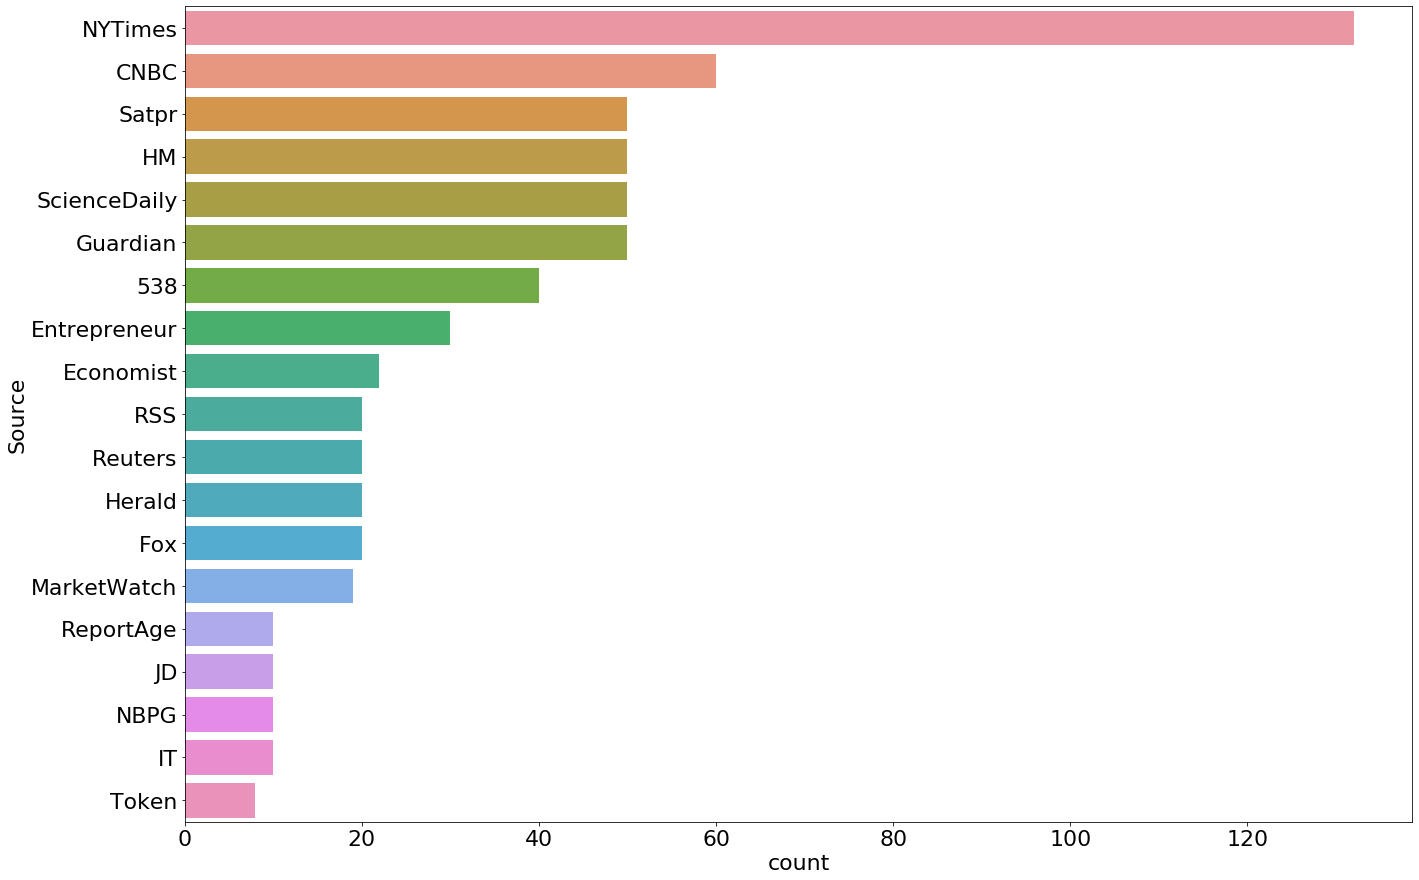

<Figure size 432x288 with 0 Axes>

In [87]:
sns.countplot(y = "Source" , data = df , order = df["Source"].value_counts().index)
plt.gcf().set_size_inches(22, 15)
plt.figure()

<Figure size 432x288 with 0 Axes>

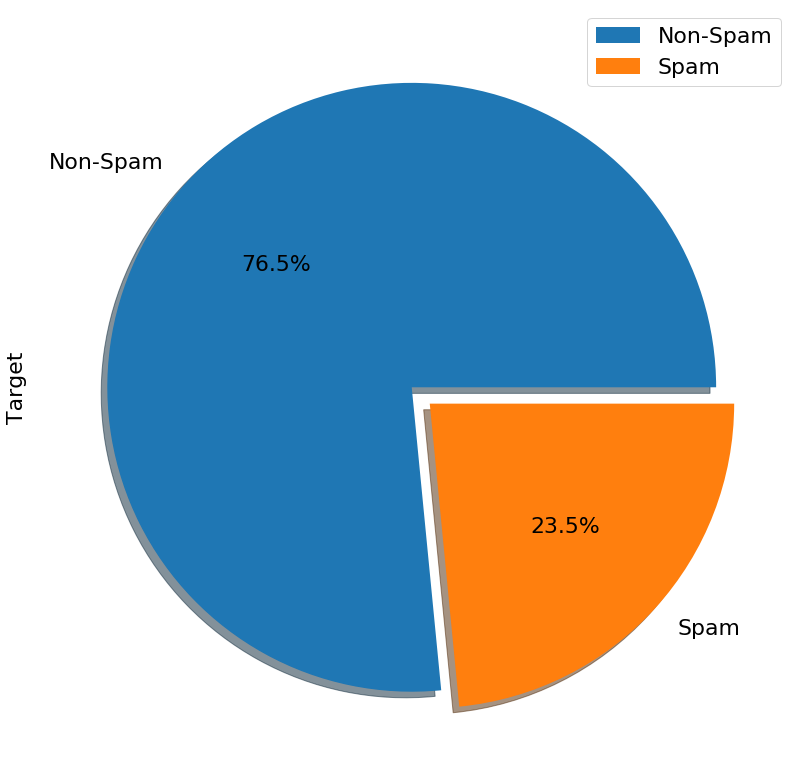

<Figure size 432x288 with 0 Axes>

In [98]:
pd.Series(df["Target"]).value_counts().plot(kind = "pie" , explode = [0, 0.08] , autopct='%1.1f%%', shadow = True)
plt.legend(["Non-Spam", "Spam"])
plt.gcf().set_size_inches(15, 14)
plt.figure()

In [109]:
#Concatenating Text and Title into single column

df['TnT']=df1['title'].astype(str)+'-'+df['text']

In [209]:
df.head()

,Target,TnT
0,0,cramer remix one bright spot tough weekcnbc ji...
1,0,cramer dropbox deserv trade like cloud king ca...
2,0,cramer tommi hilfig parent pvh buy ahead earni...
3,0,cramer game plan prepar white hous chaospayche...
4,0,five dow stock bear market territori merck gen...


In [118]:
#Word Cloud
import wordcloud

In [119]:
def show_wordcloud(data_spam_or_notSpam, title):
    text = ' '.join(data_spam_or_notSpam['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='nipy_spectral', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

In [111]:
df1 = df[['title','text','Target']].copy()

In [112]:
df1.head()

,title,text,Target
0,Cramer Remix: The one bright spot after a toug...,CNBC's Jim Cramer welcomed Dropbox's successfu...,Non-Spam
1,Cramer: Dropbox deserves to trade like a cloud...,CNBC's Jim Cramer welcomed Dropbox's successfu...,Non-Spam
2,Cramer: Tommy Hilfiger parent PVH is a buy ahe...,After a week of panic and selling for the stoc...,Non-Spam
3,Cramer's game plan: Be prepared for more White...,Paychex: This old Cramer-fave will report earn...,Non-Spam
4,Five Dow stocks are in bear market territory. ...,The major indexes tried to recover Friday afte...,Non-Spam


In [113]:
data_notSpam  = df1[df1['Target'] == 'Non-Spam'].copy()
data_spam = df1[df1['Target'] == 'Spam'].copy()

In [114]:
data_notSpam = data_notSpam[['text']].copy()
data_spam = data_spam[['text']].copy()

#df1 = df[['title','text','Target']].copy()

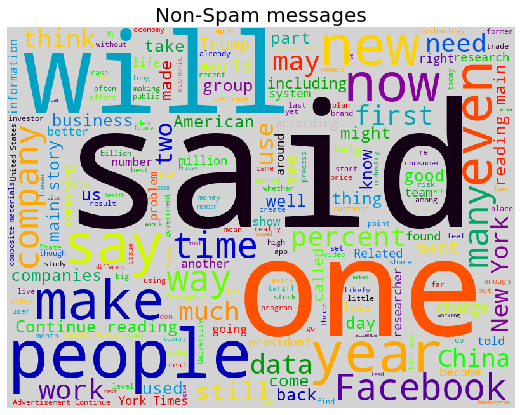

In [120]:
show_wordcloud(data_notSpam, "Non-Spam messages")

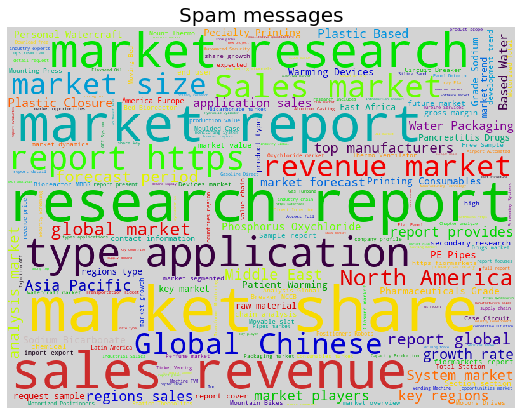

In [121]:
show_wordcloud(data_spam, "Spam messages")

In [122]:
df.head()

,text,title,Source,Target,TnT
0,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer Remix: The one bright spot after a toug...,CNBC,Non-Spam,Cramer Remix: The one bright spot after a toug...
1,CNBC's Jim Cramer welcomed Dropbox's successfu...,Cramer: Dropbox deserves to trade like a cloud...,CNBC,Non-Spam,Cramer: Dropbox deserves to trade like a cloud...
2,After a week of panic and selling for the stoc...,Cramer: Tommy Hilfiger parent PVH is a buy ahe...,CNBC,Non-Spam,Cramer: Tommy Hilfiger parent PVH is a buy ahe...
3,Paychex: This old Cramer-fave will report earn...,Cramer's game plan: Be prepared for more White...,CNBC,Non-Spam,Cramer's game plan: Be prepared for more White...
4,The major indexes tried to recover Friday afte...,Five Dow stocks are in bear market territory. ...,CNBC,Non-Spam,Five Dow stocks are in bear market territory. ...


In [123]:
#Dataframe for Title
df_title = df[['title','Target']].copy()

In [124]:
del df['text']
del df['title']
del df['Source']

# Data Preprocessing

In [131]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

In [128]:
df['Target'] = np.where((df['Target'] == "Spam"), 1, 0)

In [129]:
df

,Target,TnT
0,0,Cramer Remix: The one bright spot after a toug...
1,0,Cramer: Dropbox deserves to trade like a cloud...
2,0,Cramer: Tommy Hilfiger parent PVH is a buy ahe...
3,0,Cramer's game plan: Be prepared for more White...
4,0,Five Dow stocks are in bear market territory. ...
5,0,Bank of America in $42 million settlement over...
6,0,Citi downgrades red-hot chip stock Micron due ...
7,0,Cramer on Trump's China tariffs: Beijing is so...
8,0,PRO Talks: Wells Fargo's Darrell Cronk on why ...
9,0,Market retest of February correction is actual...


In [132]:
# function to preprocess data

stops = set(stopwords.words("english"))
def cleanData(text, lowercase = False, remove_stops = False, stemming = False):
    txt = str(text)
    txt = re.sub(r'[^A-Za-z0-9\s]',r'',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])
    
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])

    return txt

In [133]:
df1 = df

In [135]:
# clean TnT
df1['TnT'] = df1['TnT'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True, stemming=True))

In [137]:
#Using Tfidf

tfidfvec = TfidfVectorizer(analyzer='word', ngram_range = (1,1), min_df = 20, max_features=2000)

In [138]:
tfidfdata = tfidfvec.fit_transform(df1['TnT'])

In [139]:
tfidfdata

<631x1579 sparse matrix of type '<class 'numpy.float64'>'
	with 101483 stored elements in Compressed Sparse Row format>

In [140]:
#Converting tfidfdata into dataframe

tfidf_df = pd.DataFrame(tfidfdata.todense())

In [142]:
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.050019,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.063719,0.000000,0.000000,0.0,0.0,0.0,0.032848,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.106652,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.044887,0.081419,0.145143,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.050138,0.0,0.0,0.0,0.057439,0.067821,0.0,0.0,0.0,0.072249,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.047665,0.0,0.0


# Modelling

In [143]:
import sklearn
from sklearn import metrics
# import metrics we'll need
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc

In [144]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(tfidf_df, df1.Target, test_size = 0.20)

# Logistic Regression

In [162]:
# import the model
from sklearn.linear_model import LogisticRegression
from datetime import datetime
start_time = datetime.now()
# instantiate the estimator
log = LogisticRegression(penalty='l1',max_iter=50)
print(log)

# fit the model
log.fit(Xtrain, ytrain)

# predict the response
y_pred = log.predict(Xtest)

# accuracy score
pred_logreg = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for Logistic Regression: {}".format(pred_logreg))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy for Logistic Regression: 0.937007874015748
Duration: 0:00:00.022878


In [160]:
#Grid Search

from sklearn.model_selection import GridSearchCV
log_gs = LogisticRegression()
param = {'max_iter': [20, 30, 40, 50]}

gs = GridSearchCV(log_gs, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(Xtrain, ytrain)

In [161]:
print(gs_fit.best_params_)
print(gs_fit.best_score_)

{'max_iter': 50}
0.9523809523809523


In [163]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        96
           1       0.96      0.77      0.86        31

    accuracy                           0.94       127
   macro avg       0.95      0.88      0.91       127
weighted avg       0.94      0.94      0.93       127



# KNN

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
start_time = datetime.now()
# instantiate the estimator
knn = KNeighborsClassifier(n_neighbors=7)
print(knn)
# fit the model
knn.fit(Xtrain, ytrain)

# predict the response
y_pred = knn.predict(Xtest)

# accuracy score
pred_knn = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for KNN: {}".format(pred_knn))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
Accuracy for KNN: 0.9291338582677166
Duration: 0:00:00.239932


In [165]:
#Grid Search

from sklearn.model_selection import GridSearchCV
kgs = KNeighborsClassifier()
param = {'n_neighbors': [5, 7, 10]}

gs = GridSearchCV(kgs, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(Xtrain, ytrain)

In [166]:
print(gs_fit.best_params_)
print(gs_fit.best_score_)

{'n_neighbors': 7}
0.9761904761904762


In [168]:
#Applying 10-fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = Xtrain, y = ytrain, cv = 10)
accuracies.mean()

0.9760704281712684

In [169]:
confusion_matrix(ytest, y_pred)

array([[95,  1],
       [ 8, 23]])

In [170]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        96
           1       0.96      0.74      0.84        31

    accuracy                           0.93       127
   macro avg       0.94      0.87      0.90       127
weighted avg       0.93      0.93      0.93       127



# Random Forest

In [171]:
# import the model
from sklearn.ensemble import RandomForestClassifier
start_time = datetime.now()
# instantiate the estimator
rf = RandomForestClassifier(n_estimators=30, max_depth=30)
print(rf)

# fit the model
rf.fit(Xtrain, ytrain)

# predict the response
y_pred = rf.predict(Xtest)

# accuracy score
pred_rf = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for Random Forest {}".format(pred_rf))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy for Random Forest 0.9763779527559056
Duration: 0:00:00.122776


In [172]:
#Applying 10-fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = Xtrain, y = ytrain, cv = 10)
accuracies.mean()

0.996078431372549

In [173]:
#Grid Search

from sklearn.model_selection import GridSearchCV
rfgs = RandomForestClassifier()
param = {'n_estimators': [20, 30, 45, 60],
        'max_depth': [20, 30, 60, 90, None]}

gs = GridSearchCV(rfgs, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(Xtrain, ytrain)

In [174]:
print(gs_fit.best_params_)
print(gs_fit.best_score_)

{'max_depth': 30, 'n_estimators': 30}
0.996031746031746


In [175]:
confusion_matrix(ytest, y_pred)

array([[96,  0],
       [ 3, 28]])

In [176]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        96
           1       1.00      0.90      0.95        31

    accuracy                           0.98       127
   macro avg       0.98      0.95      0.97       127
weighted avg       0.98      0.98      0.98       127



# Naive Bayes

In [177]:
mod1 = GaussianNB()

print(cross_val_score(mod1, Xtrain, ytrain, cv=10, scoring=make_scorer(accuracy_score)))

[0.96078431 0.94117647 0.94117647 0.96078431 0.92156863 0.94117647
 0.96078431 0.93877551 0.93877551 0.95918367]


In [178]:
start_time = datetime.now()
mod1.fit(Xtrain, ytrain)
y_pred = mod1.predict(Xtest)

# accuracy score
nv = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for Naive Bayes {}".format(nv))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy for Naive Bayes 0.9291338582677166
Duration: 0:00:00.035255


In [179]:
confusion_matrix(ytest,y_pred)

array([[96,  0],
       [ 9, 22]])

In [180]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        96
           1       1.00      0.71      0.83        31

    accuracy                           0.93       127
   macro avg       0.96      0.85      0.89       127
weighted avg       0.94      0.93      0.92       127



# Modelling on Title

In [181]:
df_title.head()

,title,Target
0,Cramer Remix: The one bright spot after a toug...,Non-Spam
1,Cramer: Dropbox deserves to trade like a cloud...,Non-Spam
2,Cramer: Tommy Hilfiger parent PVH is a buy ahe...,Non-Spam
3,Cramer's game plan: Be prepared for more White...,Non-Spam
4,Five Dow stocks are in bear market territory. ...,Non-Spam


In [182]:
df_title['Target'] = np.where((df_title['Target'] == "Spam"), 1, 0)

In [184]:
df_title.head()

,title,Target
0,Cramer Remix: The one bright spot after a toug...,0
1,Cramer: Dropbox deserves to trade like a cloud...,0
2,Cramer: Tommy Hilfiger parent PVH is a buy ahe...,0
3,Cramer's game plan: Be prepared for more White...,0
4,Five Dow stocks are in bear market territory. ...,0


In [185]:
# clean Title
df_title['title'] = df_title['title'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True, stemming=True))

In [186]:
tfidfdata_title = tfidfvec.fit_transform(df_title['title'])

In [187]:
#Converting tfidfdata into dataframe

tfidf_df_title = pd.DataFrame(tfidfdata_title.todense())

In [189]:
tfidf_df_title.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(tfidf_df_title, df_title.Target, test_size = 0.20)

# Logistic Regression

In [191]:
# import the model
from sklearn.linear_model import LogisticRegression
from datetime import datetime
start_time = datetime.now()
# instantiate the estimator
log = LogisticRegression(penalty='l1',max_iter=20)
print(log)

# fit the model
log.fit(Xtrain, ytrain)

# predict the response
y_pred = log.predict(Xtest)

# accuracy score
pred_logreg = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for Logistic Regression: {}".format(pred_logreg))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy for Logistic Regression: 0.984251968503937
Duration: 0:00:00.008394


In [192]:
#Grid Search

from sklearn.model_selection import GridSearchCV
log_gs = LogisticRegression()
param = {'max_iter': [20, 30, 50, 100]}

gs = GridSearchCV(log_gs, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(Xtrain, ytrain)

In [193]:
print(gs_fit.best_params_)
print(gs_fit.best_score_)

{'max_iter': 20}
0.9682539682539683


In [194]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        86
           1       1.00      0.95      0.97        41

    accuracy                           0.98       127
   macro avg       0.99      0.98      0.98       127
weighted avg       0.98      0.98      0.98       127



# KNN

In [195]:
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
start_time = datetime.now()
# instantiate the estimator
knn = KNeighborsClassifier(n_neighbors=5)
print(knn)
# fit the model
knn.fit(Xtrain, ytrain)

# predict the response
y_pred = knn.predict(Xtest)

# accuracy score
pred_knn = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for KNN: {}".format(pred_knn))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
Accuracy for KNN: 0.984251968503937
Duration: 0:00:00.017128


In [196]:
#Grid Search

from sklearn.model_selection import GridSearchCV
kgs = KNeighborsClassifier()
param = {'n_neighbors': [5, 7, 10]}

gs = GridSearchCV(kgs, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(Xtrain, ytrain)

In [197]:
print(gs_fit.best_params_)
print(gs_fit.best_score_)

{'n_neighbors': 5}
0.9702380952380952


In [198]:
confusion_matrix(ytest, y_pred)

array([[86,  0],
       [ 2, 39]])

In [199]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        86
           1       1.00      0.95      0.97        41

    accuracy                           0.98       127
   macro avg       0.99      0.98      0.98       127
weighted avg       0.98      0.98      0.98       127



# Random Forest

In [200]:
# import the model
from sklearn.ensemble import RandomForestClassifier
start_time = datetime.now()
# instantiate the estimator
rf = RandomForestClassifier(n_estimators=20, max_depth=45)
print(rf)

# fit the model
rf.fit(Xtrain, ytrain)

# predict the response
y_pred = rf.predict(Xtest)

# accuracy score
pred_rf = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for Random Forest {}".format(pred_rf))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy for Random Forest 0.9921259842519685
Duration: 0:00:00.052062


In [201]:
#Grid Search

from sklearn.model_selection import GridSearchCV
rfgs = RandomForestClassifier()
param = {'n_estimators': [20, 30, 45, 60],
        'max_depth': [20, 30, 60, 90, None]}

gs = GridSearchCV(rfgs, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(Xtrain, ytrain)

In [202]:
print(gs_fit.best_params_)
print(gs_fit.best_score_)

{'max_depth': 20, 'n_estimators': 45}
0.996031746031746


In [203]:
confusion_matrix(ytest, y_pred)

array([[86,  0],
       [ 1, 40]])

In [204]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        86
           1       1.00      0.98      0.99        41

    accuracy                           0.99       127
   macro avg       0.99      0.99      0.99       127
weighted avg       0.99      0.99      0.99       127



# Naive Bayes

In [205]:
mod1 = GaussianNB()

print(cross_val_score(mod1, Xtrain, ytrain, cv=10, scoring=make_scorer(accuracy_score)))

[0.92156863 1.         0.96078431 0.90196078 0.90196078 0.88235294
 0.94117647 0.89795918 0.89795918 0.91836735]


In [206]:
start_time = datetime.now()
mod1.fit(Xtrain, ytrain)
y_pred = mod1.predict(Xtest)

# accuracy score
nv = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for Naive Bayes {}".format(nv))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy for Naive Bayes 0.952755905511811
Duration: 0:00:00.008188


In [207]:
confusion_matrix(ytest,y_pred)

array([[85,  1],
       [ 5, 36]])

In [208]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        86
           1       0.97      0.88      0.92        41

    accuracy                           0.95       127
   macro avg       0.96      0.93      0.94       127
weighted avg       0.95      0.95      0.95       127

